# Exploratory Analysis of Parallel Global Voices English-French Dataset

This notebook explores the characteristics and structure of the Parallel Global Voices English-French dataset sourced from Global Voices websites.

## Import Libraries

Let's start by importing the necessary libraries.

In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

Load the Parallel Global Voices English-French dataset using the `load_dataset` function from the `datasets` library and convert it to a Pandas DataFrame.

In [5]:
segmentation_dataset = load_dataset("Nicolas-BZRD/Parallel_Global_Voices_English_French", split='train').to_pandas()
segmentation_dataset.head()

,en,fr
0,Jamaica: “I am HIV”,Jamaïque : J’ai le VIH
1,"It's widely acknowledged, in the Caribbean and...","Il est largement reconnu, dans les Caraïbes et..."
2,"For this woman, however, photographed in the s...","Pour cette femme, cependant, photographiée dan..."
3,As Bacon writes on her blog:,Comme Bacon écrit sur son blog:
4,"“When I asked to take her picture, I suggested...",“Quand je lui ai demandé de la prendre en phot...


## Data Summary and Basic Statistics

### Statistical Summary

Let's start by examining basic statistics of the dataset to understand characteristics like text length, word count, etc.

In [10]:
# Display statistical summary for English text
english_text_summary = segmentation_dataset['en'].describe()
print("Statistical Summary for English Text:")
english_text_summary

Statistical Summary for English Text:


count                    342060
unique                   340653
top       Used with permission.
freq                         31
Name: en, dtype: object

In [8]:
# Display statistical summary for French text
french_text_summary = segmentation_dataset['fr'].describe()
print("\nStatistical Summary for French Text:")
french_text_summary


Statistical Summary for French Text:


count                                                342060
unique                                               341607
top       Ce billet fait partie du dossier de Global Voi...
freq                                                      8
Name: fr, dtype: object

### Checking for Missing Values

Let's check for missing values in the dataset to ensure data completeness.

In [11]:
# Check for missing values in English text
missing_values_english = segmentation_dataset['en'].isnull().sum()
print(f"\nMissing Values in English Text: {missing_values_english}")

# Check for missing values in French text
missing_values_french = segmentation_dataset['fr'].isnull().sum()
print(f"Missing Values in French Text: {missing_values_french}")


Missing Values in English Text: 0
Missing Values in French Text: 0


## Visualizing Text Length Distributions

### Histograms of Text Lengths

Visualize the distributions of text lengths in both English and French text using histograms.

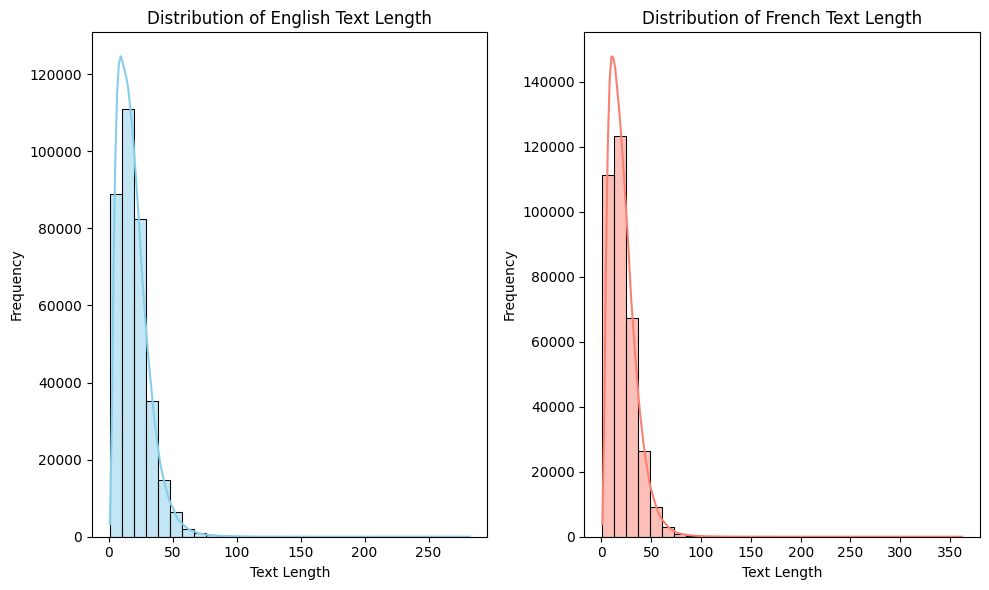

In [12]:
# Calculate text lengths for English and French text
segmentation_dataset['en_length'] = segmentation_dataset['en'].apply(
    lambda x: len(x.split()))
segmentation_dataset['fr_length'] = segmentation_dataset['fr'].apply(
    lambda x: len(x.split()))

# Plot histograms for text lengths
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(segmentation_dataset['en_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of English Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(segmentation_dataset['fr_length'], bins=30, kde=True, color='salmon')
plt.title('Distribution of French Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()